## Homework 02

### Exercise 1
One half percent of the population has a coronavirus and a test is being developed. This test gives a false positive $3\%$ of the time and a false negative $2\%$ of the time. 

1. Find the probability that Luca is positive to the test.
2. Suppose Luca is positive to the test. What is the probability that he has contracted the disease?

A = Test is positive

B = Luca has corona

\begin{equation}
P(A) = P(A|B=1)P(B=1)+P(T|B=0)P(B=0) -->
= 0.98*0.005 + 0.03*0.095 = 0.0347
\end{equation}
    
\begin{equation}
P(B |A) = \frac{P(A|B)*P(B)}{P(A=1)} -->
P(B |A) = \frac{0.98 * 0.005}{0.035} = 0.14  
\end{equation}

### Exercise 2

Implement the empirical cumulative distribution function $F_X(x)=$ `cdf(dist, x)` taking as inputs a `pyro.distributions` object `dist`, corresponding to the distribution of $X$, and a real value `x`.

Suppose that $X\sim \mathcal{N}(0,1)$ and plot $F_X(x)$.

In [151]:
import numpy as np
import torch
import pyro
import seaborn as sns
import matplotlib.pyplot as plt

pyro.set_rng_seed(42)

def cdf(dist : pyro.distributions, x):
    
    """
    This function returns the cumulative distribution of given value and plot it
    @param dist given distribution must be pyro.distribution object, 
    ex= pyro.distribution.Normal
    @param x given value to calculate the cumulative distribution
    @return cdf result of given x
    """
    
    # Create a sample 
    sample = np.sort([pyro.sample("samp", dist) for i in range(1000)])
    
    y = np.arange(1,len(sample)+1) / len(sample)
    
    x_list = []
    for i in sample:
        if i < x:
            x_list.append(i)
        else:
            break
    
    y_list = [y[i] for i in range(len(x_list))]
    
    plt.figure(figsize=(12,6))
    plt.title("CDF of "+ str(dist) + " with value " + str(x))
    plt.xlabel("sample")
    plt.ylabel("cdf")
    plt.plot(x_list,y_list)

    return y_list[-1]

0.997

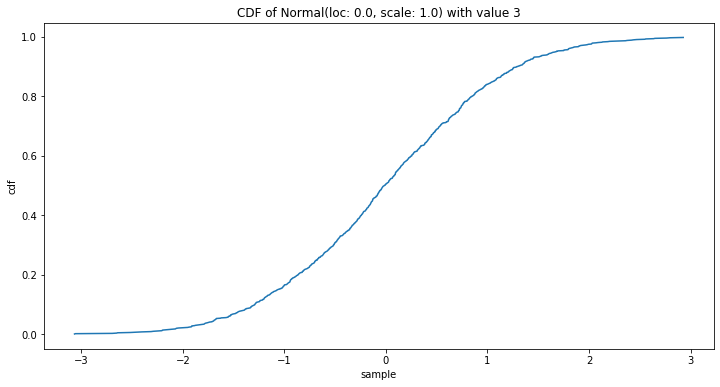

In [153]:
dist = pyro.distributions.Normal(0,1)
cdf(dist,3)

### Exercise 3

Suppose the heights of male students are normally distributed with mean $180$ and unknown variance $\sigma^2$. Suppose that $\sigma^2$ is in the range $[22,41]$ with approximately $95\%$ probability and assign to $\sigma^2$ an inverse-gamma $IG(38,1110)$ prior distribution .

1. Empirically verify that the parameters of the inverse-gamma distribution lead to a prior probability of approximately $95\%$ that  $\sigma^2\in[22,41]$.

If $\sigma^2$ is in the range $[22,41]$ with $95\%$ probability $F(X = 41) - F(X = 22)$ must be approximately 0.95 where $F(x)$ is the cumulative distribution function of the distribution. Indeed, result is $0.951$ so it can be verified that with $95\%$ probability, $\sigma^2$ is in the range $[22,41]$  

0.951

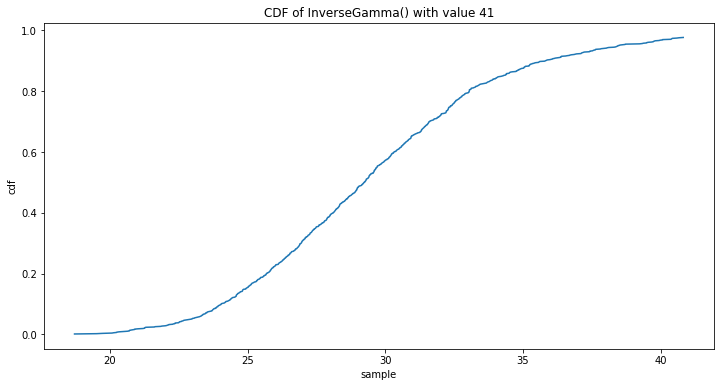

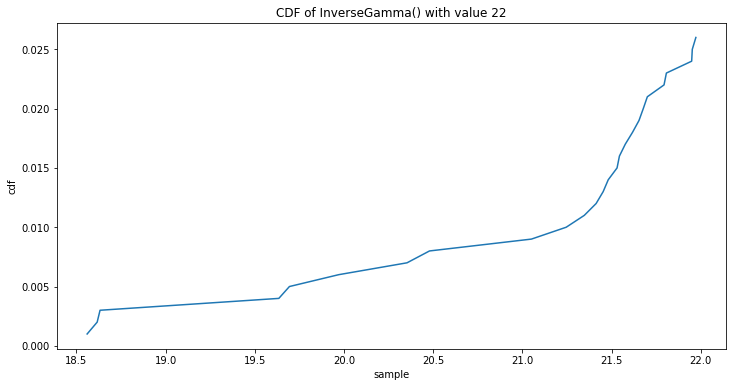

In [155]:
pyro.set_rng_seed(42)
concentration = 38
rate = 1110
sigma_square = pyro.distributions.InverseGamma(concentration,rate)

cdf(sigma_square,41) - cdf(sigma_square,22)

* [formula_ref](https://math.stackexchange.com/questions/1373348/confidence-interval-of-inverse-gamma-distribution)

2. Derive the posterior density of $\sigma^2$ corresponding to the following data: $183,173,181,170,176,180,187,176,171,190,184,173,176,179,181,186$.

Then plot it together with the prior density.

$Posterior \space density \propto Likelihood \times Prior \space density$

$P(\sigma^2 | X) \propto P(X | \sigma^2) \times P(\sigma^2)$

We know that

$X \sim \mathcal{N}(180,\sigma^2)\space and \space \sigma^2 \sim IG(38,1110)$

\begin{equation}
\prod_{i=0}^{n}\frac{1}{\sigma^2 \sqrt{2 \pi}} e^{\frac{-(x-\mu)^{2}}{2\sigma^2}} \frac{\beta^\alpha e^ {\frac{-\beta}{\sigma^2}}}{\Gamma(\alpha) \sigma^{2\alpha-2}}
\end{equation}


After we remove the terms which doesn't depend on $\sigma$ we have:

\begin{equation}
\prod_{i=0}^{n}\frac{1}{\sigma^2} e^{\frac{-(x-\mu)^{2}}{2\sigma^2}} \frac{ e^ {\frac{-\beta}{\sigma^2}}}{\sigma^{2\alpha-2}}
\end{equation}

[likelihood of normal dist](https://www.statlect.com/fundamentals-of-statistics/normal-distribution-maximum-likelihood)

\begin{equation}
\left(\frac{1}{\sigma^2}\right)^{\frac{n}{2}}e^{\frac{-1}{2\sigma^2}\sum_{i=1}^{n}(x-\mu)^2} \frac{ e^ {\frac{-\beta}{\sigma^2}}}{\sigma^{2\alpha-2}} =  \left( \frac{1}{(\sigma ^2)^{\alpha + \frac{n}{2} -1}} \right) e^{-\frac{1}{\sigma ^2} \left( \beta + \frac{1}{2} \sum_{i=1}^n( x_i - \mu)^2 \right)}
\end{equation}

which is an $IG(38 + \frac{n}{2}, 1110 + \frac{1}{2} \sum_{i=1}^n( x- \mu)^2) = IG(46, 1373.875)$. 

In [11]:
observation = np.array([183,173,181,170,176,180,187,176,171,190,184,173,176,179,181,186])
print("n =",len(observation))
print("mu =", observation.mean())

total = 0
bar = observation.mean()
for x in observation:
    total += (x-bar)**2
print("1/2 * sum{(x-mu)}^2 =",total/2)

n = 16
mu = 179.125
1/2 * sum{(x-mu)}^2 = 263.875


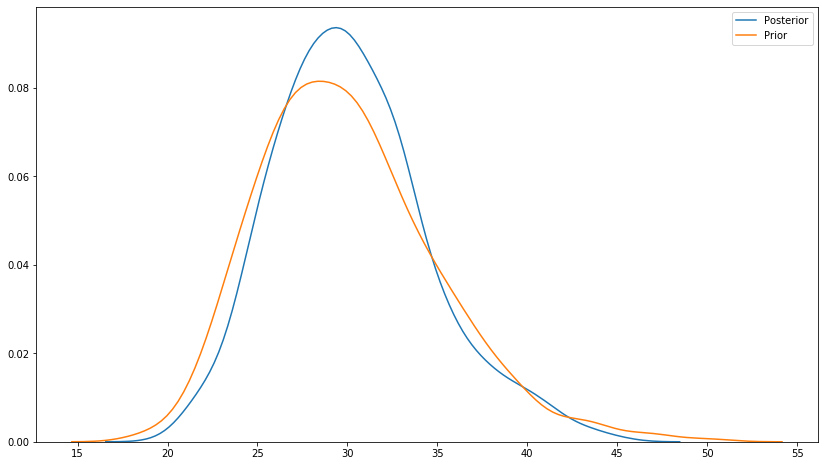

In [12]:
pyro.set_rng_seed(42)

list1 = [pyro.sample("my_sample", pyro.distributions.InverseGamma(46,1373.875)) for _ in range(1000)]
list2 = [pyro.sample("my_sample", pyro.distributions.InverseGamma(38,1110)) for _ in range(1000)]

plt.figure(figsize=(14,8))
sns.distplot(list1,hist=False,label="Posterior")
sns.distplot(list2,hist=False,label="Prior")

3. Compute the posterior density of the standard deviation $\sigma$.

![title](pdf_of_std.png)

[reference](https://scholarsarchive.byu.edu/cgi/viewcontent.cgi?article=1277&context=facpub)

$f_Y(y) = f_x(v(y))\times|v'(y)|$

By using change-of-variable technique we can say that $f_Y(y) = f_x(v(y))\times|v'(y)|\space where\space X = v(y)$ [change-of-variable-ref](https://online.stat.psu.edu/stat414/node/157/)

$v(y) = y^2$ so $v'(y) = 2y$

\begin{equation}
f_Y(y) = \frac{\beta^\alpha e^ {\frac{-\beta}{y^2}}}{\Gamma(\alpha) y^{2\alpha-2}} \times 2y
\end{equation}
\begin{equation}
 f(y) = \frac{2\beta^\alpha e^ {\frac{-\beta}{y^2}}}{\Gamma(\alpha) y^{2\alpha+1}}
\end{equation}

### Exercise 4
Prove that the Gamma distribution is the conjugate prior distribution for the Exponential likelihood.

Let's assume that $X\sim \mathcal{Exp}(\lambda)$ so likelihood is $P(X|\lambda) = \lambda e^{-\lambda x}$

\begin{equation}
\lambda \sim Gamma(\alpha, \beta) , p(\lambda) = \frac{\beta^\alpha \times \lambda ^{\alpha-1}}{\Gamma(\alpha)}e^{-\beta \lambda}
\end{equation}

\begin{equation}
P(\lambda | X) = \frac{P(X|\lambda) \times p(\lambda)}{P(X)}
\end{equation}

Since $P(x)$ has no relation with $\lambda$ it is negligible

\begin{equation}
P(X|\lambda) \times p(\lambda)
\end{equation}

\begin{equation}
= \frac{\beta^\alpha \times \lambda ^{\alpha-1}}{\Gamma(\alpha)}e^{-\beta \lambda} \times \lambda e^{-\lambda.x}
\end{equation}

\begin{equation}
= \frac{\beta^\alpha \times \lambda ^{\alpha-1}}{\Gamma(\alpha)}e^{-\beta \lambda} \prod_{i=0}^{n}\lambda e^{-\lambda x_i}
\end{equation}

So terms which are independent from $\lambda$ (like $\beta ^ {\lambda}$ and $\Gamma(\alpha)$) simplified

\begin{equation}
= \lambda^{\alpha-1} e^{-\beta \lambda} \times \lambda^n e^{\lambda n \bar x}
\end{equation}
\begin{equation}
= \lambda^{\alpha + n -1} e^{-\lambda(\beta + n \bar x)}
\end{equation}
\begin{equation}
\sim Gamma(\alpha +n , \beta + n \bar x)
\end{equation}